<a href="https://colab.research.google.com/github/luanavsr/VaR_Portfolio/blob/main/VaR%2C_CVaR_e_Simula%C3%A7%C3%A3o_de_Monte_Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

VaR e Simulação de Monte Carlo

O objeetivo do código é criar racional para determinas os requesitos abaixo. Para tanto, foram calculados o VaR, CVaR e simulados cenários de preços usando a Simulação de Monte Carlo.

1.	Proposta de valor de margem inicial a ser solicitado quando um cliente operar contrato.
2.	Dado que precisaremos arcar com margem de variação referente aos hedges realizados,  estabelecer os limites operacionais dentro dos quais a mesa poderá operar


In [ ]:
# Importando os pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Dados brutos
data_df = pd.read_excel('/content/Auxiliar(1).xlsx',index_col='Data').sort_values(by= 'Data')
data_df['CCM USD'] = data_df['CCM']*data_df['PTAX']
# Calculando os retornos em log, para retorno simples use: data_df.pct_change().dropna()
returns_df = data_df.apply(np.log).diff().dropna()
port_returns = returns_df['CCM USD']

# Definindo o nível de confiança (99,99%)
alpha = 0.0001

# Calculando o VaR diário do portfólio
var = norm.ppf(alpha, port_returns.mean(), port_returns.std())

# Definindo um capital inicial (valor do contrato cheio) e a perda máxima em termos monetários
capital = 450*320.37
max_loss = var*capital

# Print dos resultados
print(f'\n \n Para um intervalo de confiança de {(1-alpha)*(100)}%, o VaR diário é {var*100}% para o portfólio. \n Em termos monetários, considerando um capital de {capital}, a perda máxima diária é de {max_loss}')

# Calculando o CVaR - Expected Shortfall - 99,99%
cvar = (port_returns[port_returns <= var].mean())
max_loss_cvar = cvar*capital

# Print dos resultados
print(f'\n \n Para um intervalo de confiança de {(1-alpha)*(100)}%, o CVaR diário é {cvar*100}% para o portfólio. \n Em termos monetários, considerando um capital de {capital}, a perda máxima diária é de {max_loss_cvar}')



 
 Para um intervalo de confiança de 99.99%, o VaR diário é -6.974975363878627% para o portfólio. 
 Em termos monetários, considerando um capital de 144166.5, a perda máxima diária é de -10055.577857966082

 
 Para um intervalo de confiança de 99.99%, o CVaR diário é -10.395614267684863% para o portfólio. 
 Em termos monetários, considerando um capital de 144166.5, a perda máxima diária é de -14986.993243221898


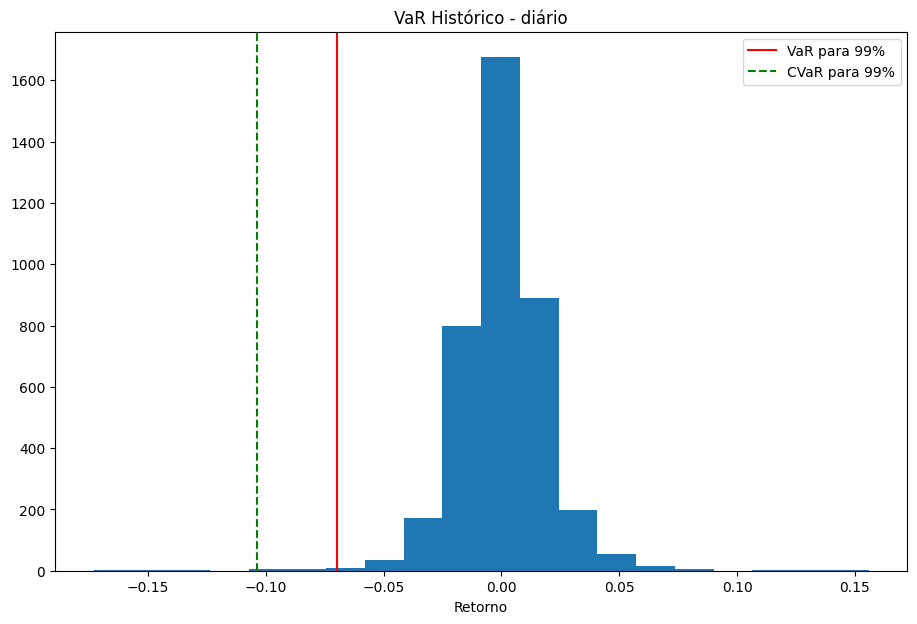

In [ ]:
# Plot da distribuição dos retornos
plt.figure(figsize = (11,7))
plt.hist(port_returns.values, bins=20)
plt.axvline(var, color='red', linestyle='solid')
plt.axvline(cvar, color='green', linestyle='--')
plt.legend(['VaR para 99%', 'CVaR para 99%'])
plt.title('VaR Histórico - diário');
plt.xlabel('Retorno');

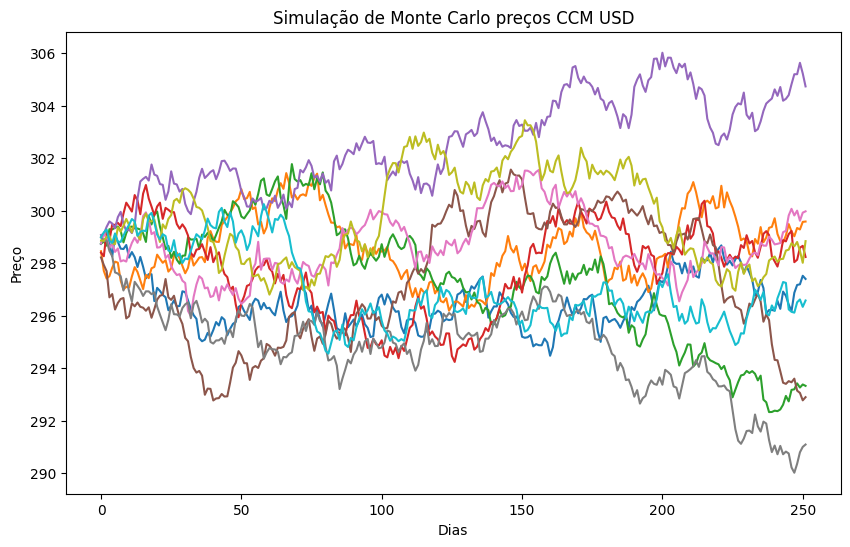

In [ ]:
# Monte Carlo para gerar preços futuros
# Preço inicial do ativo
preco_inicial = data_df['CCM USD'][-1]

# Retorno médio
taxa_retorno = port_returns.mean()

# Vol diária
volatilidade = port_returns.std()

# Número de dias de simulação
dias_simulacao = 252

# Número de simulações
num_simulacoes = 10

# Simulação de Monte Carlo
simulacoes = np.zeros((dias_simulacao, num_simulacoes))
for i in range(num_simulacoes):
    retorno_diario = np.random.normal(taxa_retorno / dias_simulacao, volatilidade / np.sqrt(dias_simulacao), dias_simulacao)
    preco_simulado = preco_inicial * np.exp(np.cumsum(retorno_diario))
    simulacoes[:, i] = preco_simulado

# Plot dos resultados
plt.figure(figsize=(10, 6))
plt.plot(simulacoes)
plt.title("Simulação de Monte Carlo preços CCM USD")
plt.xlabel("Dias")
plt.ylabel("Preço")
plt.show()


In [ ]:
# VaR e CVaR dos cenários gerados por Monte Carlo
simulacoes =  pd.DataFrame(simulacoes)
simulacoes_ret = simulacoes .apply(np.log).diff().dropna()

for coluna in simulacoes_ret.columns:
  df_simul_ret = simulacoes_ret[coluna]
  simul_var = norm.ppf(alpha, df_simul_ret.mean(), df_simul_ret.std())
  simul_cvar = df_simul_ret[df_simul_ret <= simul_var].mean()

  print(simul_var, simul_cvar)

-0.004505347124213681 nan
-0.004551078417679677 nan
-0.004398583310780444 nan
-0.004787302311953966 nan
-0.004409360936888248 nan
-0.004478774824862985 nan
-0.0042533559626348975 nan
-0.004428019108795488 nan
-0.004478925063698983 nan
-0.004482244861133608 nan


In [ ]:
for coluna in simulacoes_ret.columns:
  df_simul_ret = simulacoes_ret[coluna]
  simul_var = norm.ppf(alpha, df_simul_ret.mean(), df_simul_ret.std())
  simul_cvar = df_simul_ret[df_simul_ret <= simul_var].mean()

  print(simul_var, simul_cvar)

-0.004505347124213681 nan
-0.004551078417679677 nan
-0.004398583310780444 nan
-0.004787302311953966 nan
-0.004409360936888248 nan
-0.004478774824862985 nan
-0.0042533559626348975 nan
-0.004428019108795488 nan
-0.004478925063698983 nan
-0.004482244861133608 nan


-0.10395614267684862


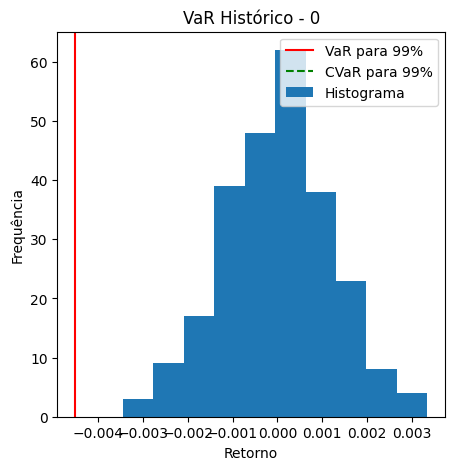

-0.10395614267684862


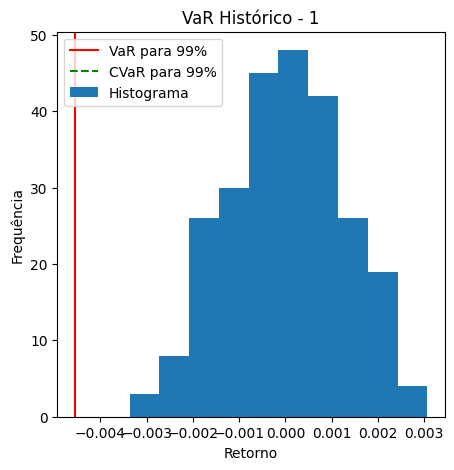

-0.10395614267684862


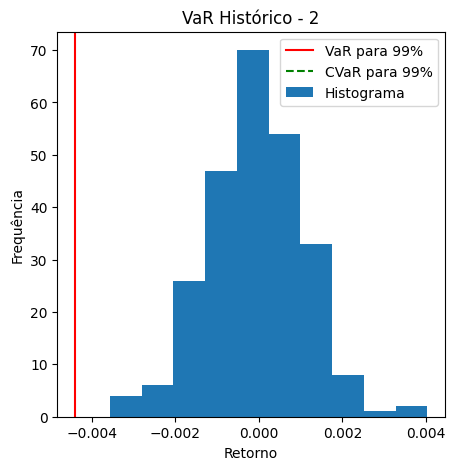

-0.10395614267684862


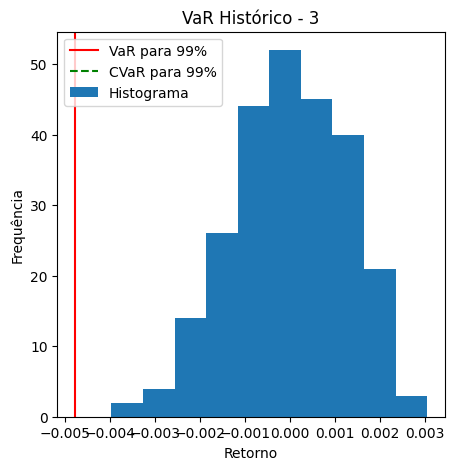

-0.10395614267684862


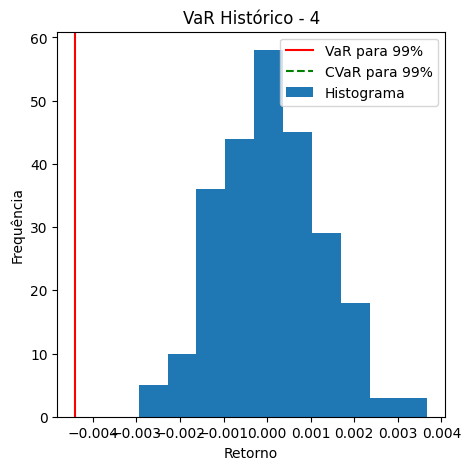

-0.10395614267684862


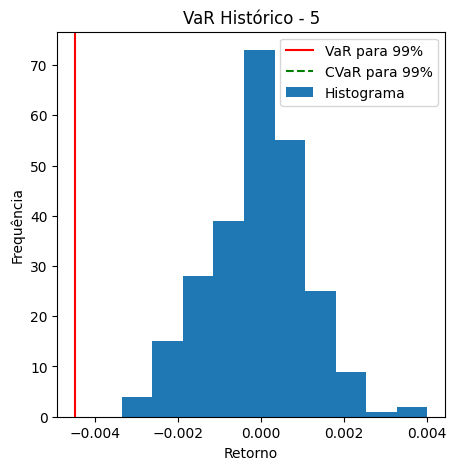

-0.10395614267684862


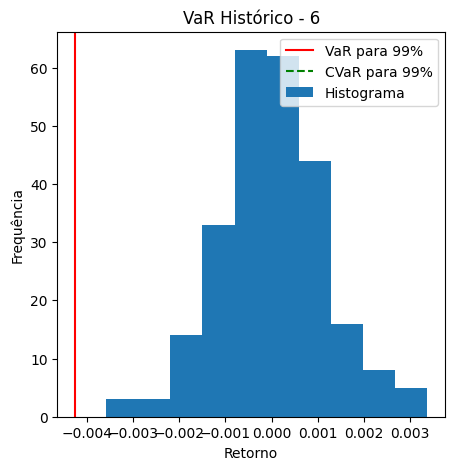

-0.10395614267684862


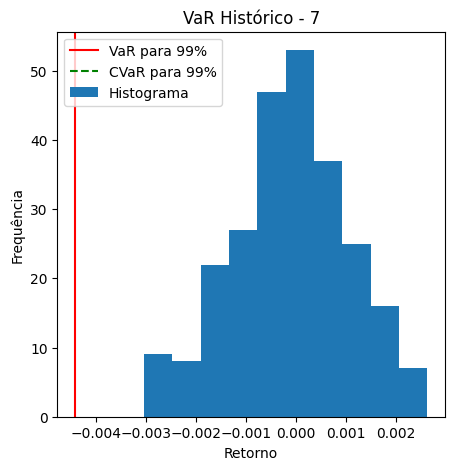

-0.10395614267684862


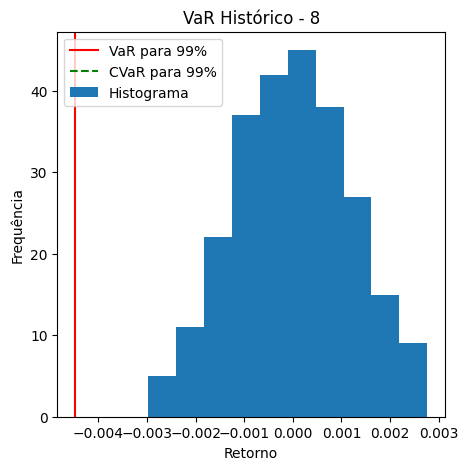

-0.10395614267684862


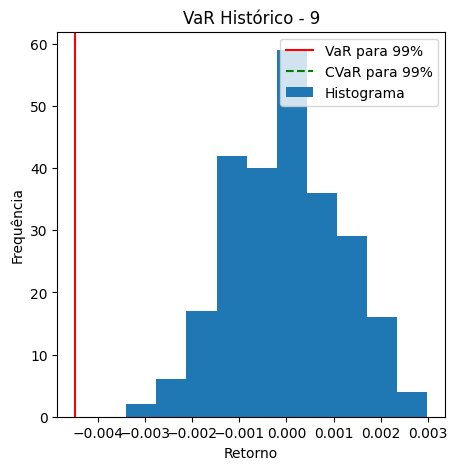

In [ ]:
# Loop para calcular VaR e CVaR para cada coluna do DataFrame
for coluna in simulacoes_ret[].columns:
    print(coluna)
    simul_var = norm.ppf(alpha, simulacoes_ret.mean(), simulacoes_ret.std())
    simul_cvar = simulacoes_ret[simulacoes_ret <= simul_var].mean()

"""
    # Plotar histograma
    plt.figure(figsize=(11, 7))
    plt.hist(simulacoes_ret, bins=20, density=True, alpha=0.6, color='b')
    plt.axvline(simul_var, color='red', linestyle='solid')
    plt.axvline(simul_cvar, color='green', linestyle='--')
    plt.legend(['VaR para 99%', 'CVaR para 99%', 'Histograma'])
    plt.title(f'VaR Histórico - {coluna}')
    plt.xlabel('Retorno')
    plt.ylabel('Frequência')
    plt.show()

  """